In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 3072))
x_test  = tf.reshape(x_test, (-1, 3072))

# data normalization
mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [2]:
# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
196/196 - 4s - loss: 1.7305 - sparse_categorical_accuracy: 0.4008 - val_loss: 1.5518 - val_sparse_categorical_accuracy: 0.4605 - 4s/epoch - 22ms/step
Epoch 2/150
196/196 - 3s - loss: 1.4626 - sparse_categorical_accuracy: 0.4848 - val_loss: 1.4771 - val_sparse_categorical_accuracy: 0.4744 - 3s/epoch - 14ms/step
Epoch 3/150
196/196 - 2s - loss: 1.3382 - sparse_categorical_accuracy: 0.5308 - val_loss: 1.4262 - val_sparse_categorical_accuracy: 0.5033 - 2s/epoch - 13ms/step
Epoch 4/150
196/196 - 2s - loss: 1.2437 - sparse_categorical_accuracy: 0.5639 - val_loss: 1.4216 - val_sparse_categorical_accuracy: 0.5095 - 2s/epoch - 12ms/step
Epoch 5/150
196/196 - 2s - loss: 1.1647 - sparse_categorical_accuracy: 0.5940 - val_loss: 1.4188 - val_sparse_categorical_accuracy: 0.5174 - 2s/epoch - 12ms/step
Epoch 6/150
196/196 - 2s - loss: 1.0901 - sparse_categorical_accuracy: 0.6184 - val_loss: 1.4277 - val_sparse_categorical_accuracy: 0.5121 - 2s/epoch - 12ms/step
Epoch 7/150
196/196 - 2s - l

Epoch 52/150
196/196 - 3s - loss: 0.1120 - sparse_categorical_accuracy: 0.9621 - val_loss: 4.3616 - val_sparse_categorical_accuracy: 0.5064 - 3s/epoch - 16ms/step
Epoch 53/150
196/196 - 3s - loss: 0.0848 - sparse_categorical_accuracy: 0.9710 - val_loss: 4.5792 - val_sparse_categorical_accuracy: 0.4983 - 3s/epoch - 17ms/step
Epoch 54/150
196/196 - 3s - loss: 0.0913 - sparse_categorical_accuracy: 0.9699 - val_loss: 4.5862 - val_sparse_categorical_accuracy: 0.5058 - 3s/epoch - 16ms/step
Epoch 55/150
196/196 - 3s - loss: 0.1538 - sparse_categorical_accuracy: 0.9498 - val_loss: 4.6008 - val_sparse_categorical_accuracy: 0.4987 - 3s/epoch - 17ms/step
Epoch 56/150
196/196 - 3s - loss: 0.1673 - sparse_categorical_accuracy: 0.9436 - val_loss: 4.6636 - val_sparse_categorical_accuracy: 0.5010 - 3s/epoch - 17ms/step
Epoch 57/150
196/196 - 3s - loss: 0.1182 - sparse_categorical_accuracy: 0.9599 - val_loss: 4.6995 - val_sparse_categorical_accuracy: 0.5022 - 3s/epoch - 17ms/step
Epoch 58/150
196/196 -

Epoch 103/150
196/196 - 3s - loss: 0.0828 - sparse_categorical_accuracy: 0.9740 - val_loss: 6.4257 - val_sparse_categorical_accuracy: 0.5060 - 3s/epoch - 17ms/step
Epoch 104/150
196/196 - 3s - loss: 0.0720 - sparse_categorical_accuracy: 0.9780 - val_loss: 6.5688 - val_sparse_categorical_accuracy: 0.4963 - 3s/epoch - 16ms/step
Epoch 105/150
196/196 - 3s - loss: 0.0929 - sparse_categorical_accuracy: 0.9722 - val_loss: 6.5442 - val_sparse_categorical_accuracy: 0.5039 - 3s/epoch - 17ms/step
Epoch 106/150
196/196 - 3s - loss: 0.0910 - sparse_categorical_accuracy: 0.9724 - val_loss: 6.5619 - val_sparse_categorical_accuracy: 0.5015 - 3s/epoch - 17ms/step
Epoch 107/150
196/196 - 3s - loss: 0.0781 - sparse_categorical_accuracy: 0.9758 - val_loss: 6.6084 - val_sparse_categorical_accuracy: 0.4962 - 3s/epoch - 17ms/step
Epoch 108/150
196/196 - 3s - loss: 0.0624 - sparse_categorical_accuracy: 0.9805 - val_loss: 6.6611 - val_sparse_categorical_accuracy: 0.5097 - 3s/epoch - 17ms/step
Epoch 109/150
19

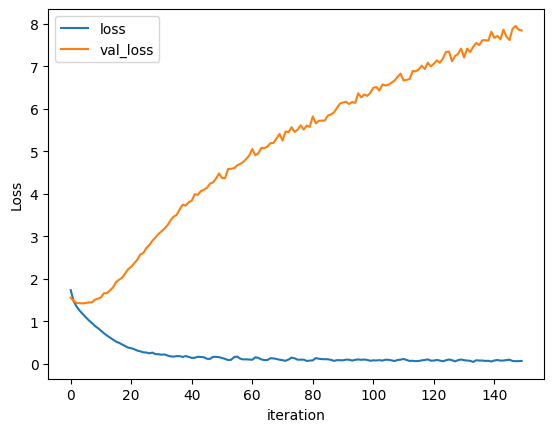

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

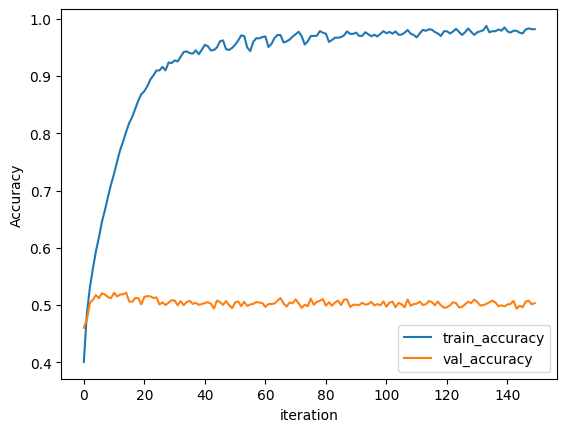

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()